In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

learning_rate = 1e-3
learning_rate = 0.002
mnist_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
mnist_data = list(mnist_data)[:4096]


other_data = datasets.Flowers102('data2', split="train", download=True,
                               transform=transforms.Compose([
                               transforms.Resize(128),
                               transforms.CenterCrop(128),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                               transforms.Grayscale(num_output_channels=1),
                           ]))
other_data = list(other_data)[:4096]

In [55]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential( # like the Composition layer you built
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [56]:
def train(model, num_epochs=5, batch_size=64, learning_rate=learning_rate):
    torch.manual_seed(42)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    train_loader = torch.utils.data.DataLoader(other_data, batch_size=batch_size, shuffle=True)
    outputs = []
    for epoch in range(num_epochs):
        for data in train_loader:
            img, label = data
            recon = model(img)
            loss = criterion(recon, img)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
        outputs.append((epoch, img, recon),)
    return outputs


model = Autoencoder()
max_epochs = 200
outputs = train(model, num_epochs=max_epochs)

Epoch:1, Loss:0.2529
Epoch:2, Loss:0.2827
Epoch:3, Loss:0.2534
Epoch:4, Loss:0.2603
Epoch:5, Loss:0.2785
Epoch:6, Loss:0.2733
Epoch:7, Loss:0.2594
Epoch:8, Loss:0.2449
Epoch:9, Loss:0.3051
Epoch:10, Loss:0.2733
Epoch:11, Loss:0.2825
Epoch:12, Loss:0.2379
Epoch:13, Loss:0.2397
Epoch:14, Loss:0.2247
Epoch:15, Loss:0.2529
Epoch:16, Loss:0.2435
Epoch:17, Loss:0.2563
Epoch:18, Loss:0.2593
Epoch:19, Loss:0.2433
Epoch:20, Loss:0.2561
Epoch:21, Loss:0.2715
Epoch:22, Loss:0.2450
Epoch:23, Loss:0.2648
Epoch:24, Loss:0.2724
Epoch:25, Loss:0.2637
Epoch:26, Loss:0.2713
Epoch:27, Loss:0.2353
Epoch:28, Loss:0.2725
Epoch:29, Loss:0.2581
Epoch:30, Loss:0.2650
Epoch:31, Loss:0.2520
Epoch:32, Loss:0.2261
Epoch:33, Loss:0.2769
Epoch:34, Loss:0.2509
Epoch:35, Loss:0.2510
Epoch:36, Loss:0.2134
Epoch:37, Loss:0.2051
Epoch:38, Loss:0.2265
Epoch:39, Loss:0.1861
Epoch:40, Loss:0.2101
Epoch:41, Loss:0.2011
Epoch:42, Loss:0.2054
Epoch:43, Loss:0.2136
Epoch:44, Loss:0.1943
Epoch:45, Loss:0.1834
Epoch:46, Loss:0.18

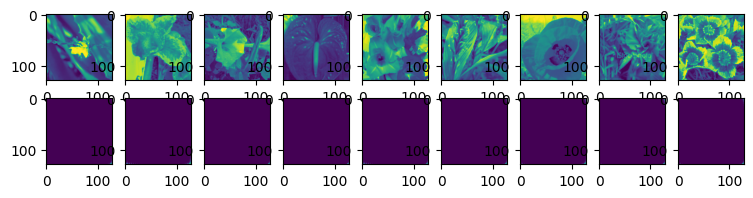

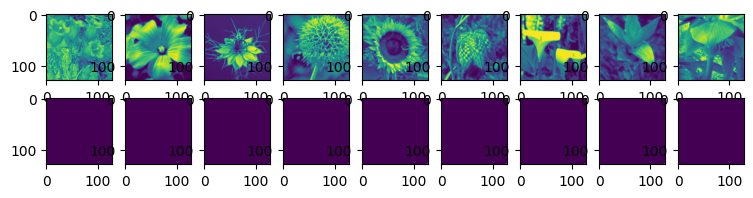

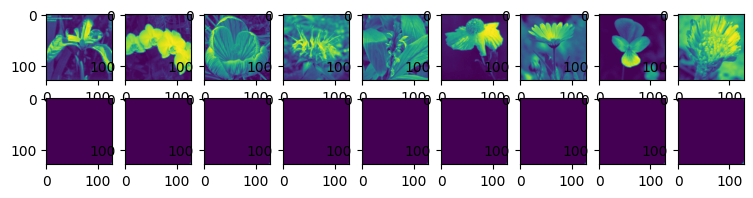

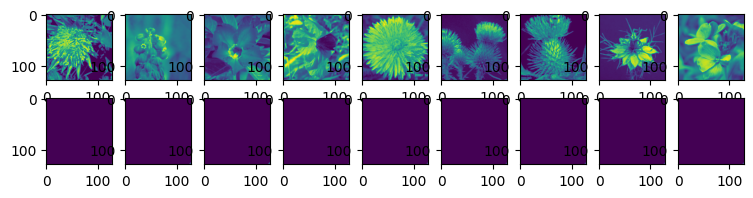

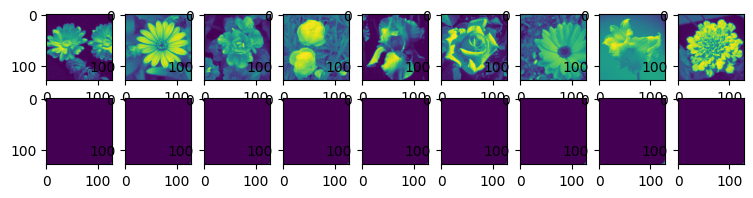

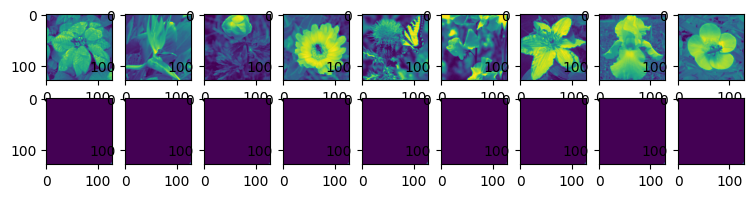

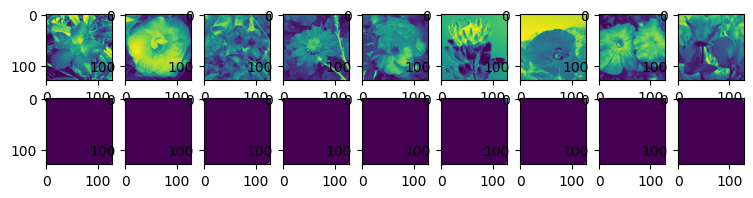

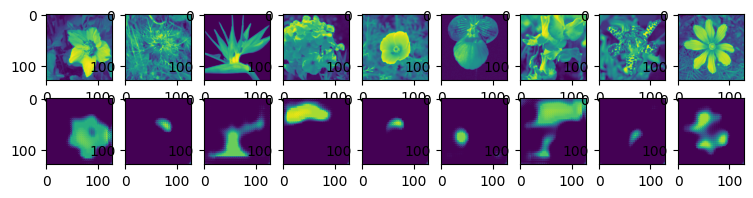

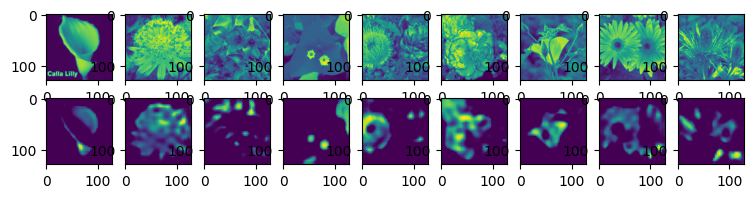

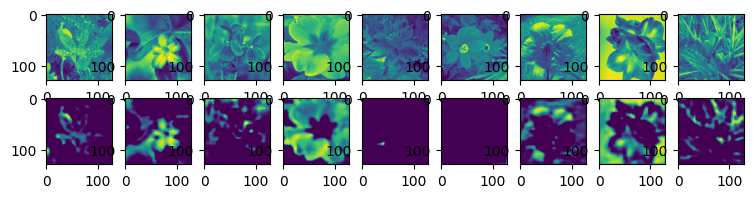

In [57]:
for k in range(0, max_epochs, 5):
    plt.figure(figsize=(9, 2))
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        plt.imshow(item[0])
        
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)
        plt.imshow(item[0])